In [33]:
# Importar las librerías necesarias
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [34]:
# Configuración de Matplotlib para español y un estilo limpio
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
sns.set_style("whitegrid")


In [35]:
# Conexión a la base de datos MySQL
try:
    conn = mysql.connector.connect(
        host='34.59.114.63',
        user='admin',
        password='Yasmina01!',
        database='pipeline_db'
    )
    cursor = conn.cursor()
    print("Conexión a MySQL exitosa.")
except mysql.connector.Error as err:
    print(f"Error al conectar a MySQL: {err}")
    conn = None

Conexión a MySQL exitosa.


In [36]:
def fetch_data(query):
    """
    Ejecuta una consulta SQL y devuelve los resultados en un DataFrame de Pandas.
    """
    if conn:
        try:
            df = pd.read_sql(query, conn)
            return df
        except Exception as e:
            print(f"Error al ejecutar la consulta: {e}")
            return None
    else:
        print("No hay conexión a la base de datos.")
        return None

C:\Users\YAS\AppData\Local\Temp\ipykernel_16664\3427463623.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depreca

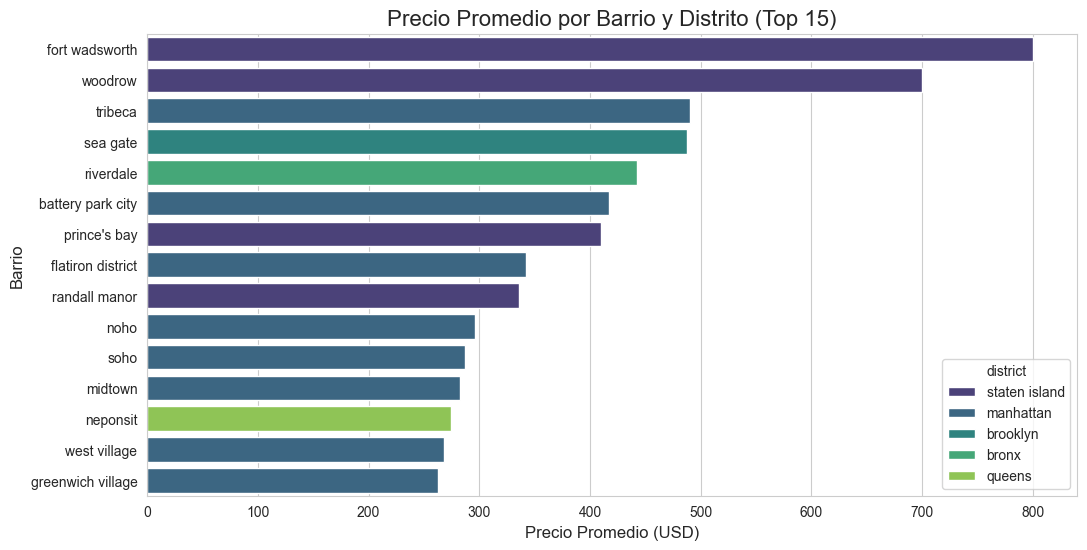

In [ ]:
### 1. ¿Cuál es el precio promedio de los alojamientos por barrio y distrito?
# Se utiliza el modelo dm_listings_by_location
query_precio_ubicacion = """
    SELECT *
    FROM dm_listings_by_location
    ORDER BY avg_price_usd DESC;
"""
df_precio_ubicacion = fetch_data(query_precio_ubicacion)

if df_precio_ubicacion is not None:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='avg_price_usd', 
        y='neighborhood', 
        hue='district', 
        data=df_precio_ubicacion.head(15), 
        palette='viridis', 
        dodge=False
    )
    plt.title('Precio Promedio por Barrio y Distrito (Top 15)', fontsize=16)
    plt.xlabel('Precio Promedio (USD)', fontsize=12)
    plt.ylabel('Barrio', fontsize=12)
    plt.show()

C:\Users\YAS\AppData\Local\Temp\ipykernel_16664\3427463623.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depreca

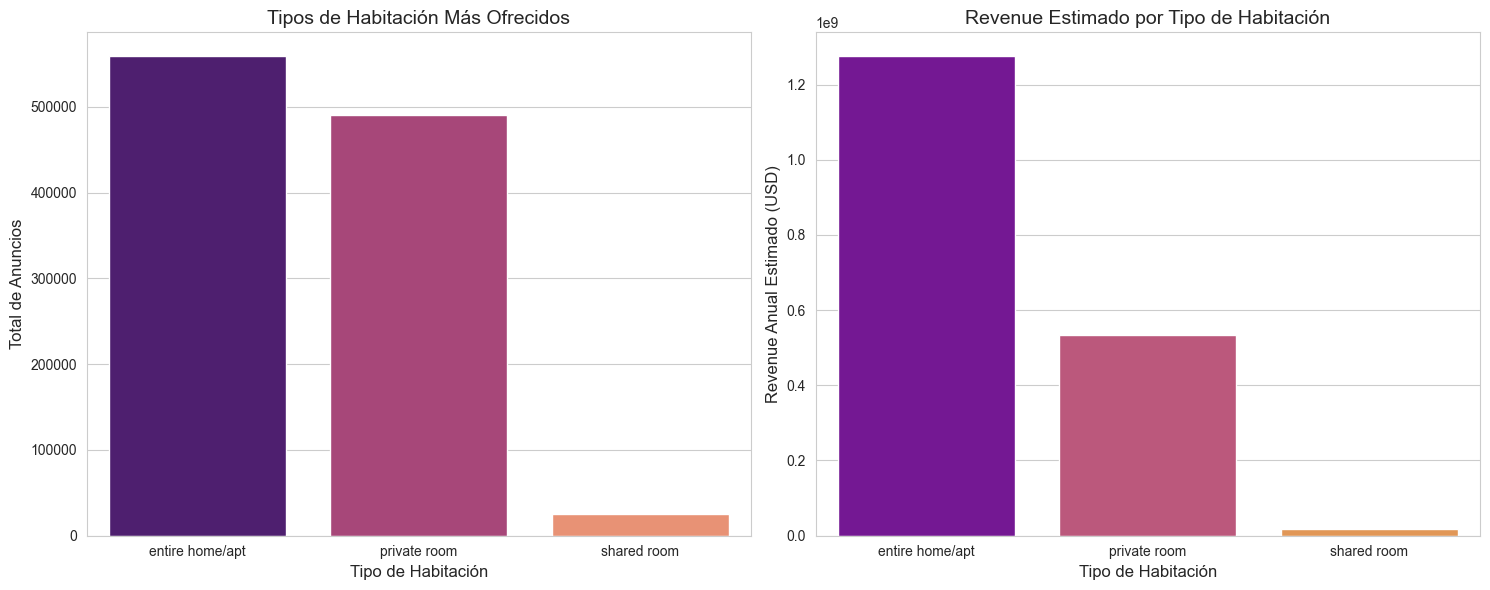

In [16]:
### 2. ¿Qué tipo de habitación es el más ofrecido y cuál genera mayor revenue estimado?
# Se utiliza el modelo dm_listings_by_room_type
query_revenue_tipo = """
    SELECT
        room_type,
        total_listings,
        total_estimated_annual_revenue
    FROM dm_listings_by_room_type
    ORDER BY total_listings DESC;
"""
df_revenue_tipo = fetch_data(query_revenue_tipo)

if df_revenue_tipo is not None:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico 1: Tipo de habitación más ofrecido
    sns.barplot(x='room_type', y='total_listings', data=df_revenue_tipo, palette='magma', ax=ax1)
    ax1.set_title('Tipos de Habitación Más Ofrecidos', fontsize=14)
    ax1.set_xlabel('Tipo de Habitación', fontsize=12)
    ax1.set_ylabel('Total de Anuncios', fontsize=12)

    # Gráfico 2: Revenue estimado por tipo de habitación
    sns.barplot(x='room_type', y='total_estimated_annual_revenue', data=df_revenue_tipo.sort_values(by='total_estimated_annual_revenue', ascending=False), palette='plasma', ax=ax2)
    ax2.set_title('Revenue Estimado por Tipo de Habitación', fontsize=14)
    ax2.set_xlabel('Tipo de Habitación', fontsize=12)
    ax2.set_ylabel('Revenue Anual Estimado (USD)', fontsize=12)

    plt.tight_layout()
    plt.show()

C:\Users\YAS\AppData\Local\Temp\ipykernel_16664\3427463623.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depreca

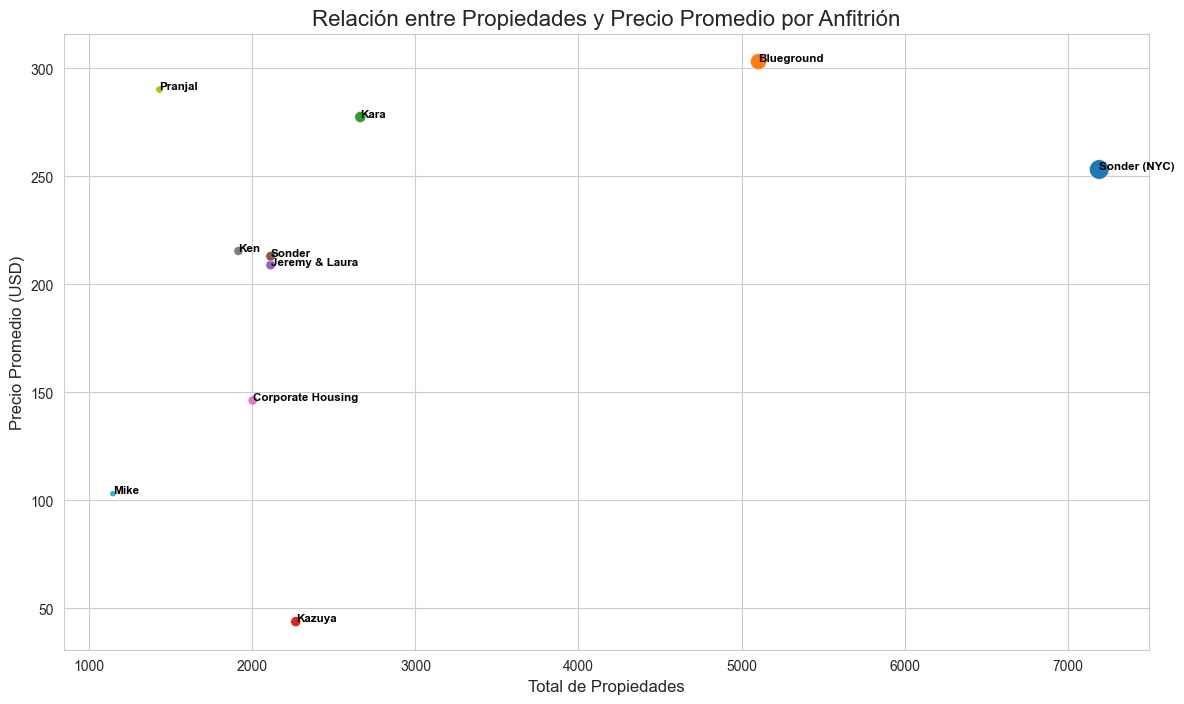

In [17]:
### 3. ¿Cuáles son los anfitriones con más propiedades listadas y cómo varían sus precios?
# Se utiliza el modelo dm_listings_by_host
query_anfitriones_propiedades = """
    SELECT
        host_name,
        total_listings,
        avg_price_usd,
        max_price_usd,
        min_price_usd
    FROM dm_listings_by_host
    ORDER BY total_listings DESC
    LIMIT 10;
"""
df_anfitriones_propiedades = fetch_data(query_anfitriones_propiedades)

if df_anfitriones_propiedades is not None:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(
        x='total_listings', 
        y='avg_price_usd', 
        hue='host_name', 
        size='total_listings', 
        data=df_anfitriones_propiedades, 
        sizes=(20, 200),
        legend=False
    )
    plt.title('Relación entre Propiedades y Precio Promedio por Anfitrión', fontsize=16)
    plt.xlabel('Total de Propiedades', fontsize=12)
    plt.ylabel('Precio Promedio (USD)', fontsize=12)
    
    # Añadir etiquetas de texto a los puntos del gráfico
    for line in range(0, df_anfitriones_propiedades.shape[0]):
        plt.text(df_anfitriones_propiedades.total_listings[line], 
                 df_anfitriones_propiedades.avg_price_usd[line], 
                 df_anfitriones_propiedades.host_name[line],
                 horizontalalignment='left',
                 size='small',
                 color='black',
                 weight='semibold')
    plt.show()

C:\Users\YAS\AppData\Local\Temp\ipykernel_16664\3427463623.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depreca

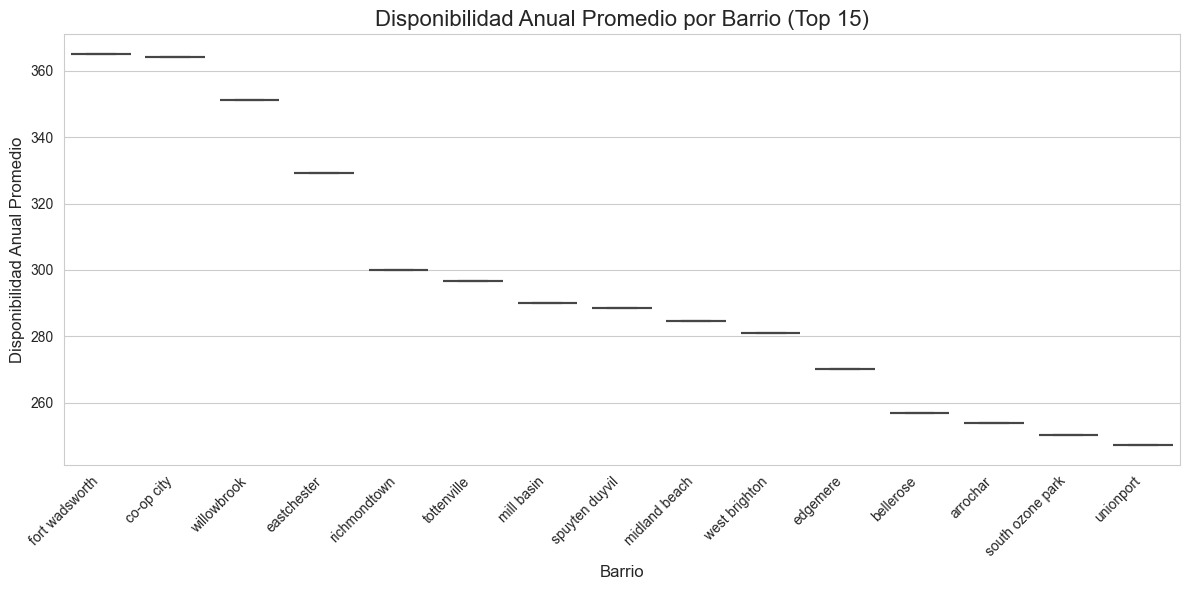

In [18]:
### 4. ¿Existen diferencias significativas en la disponibilidad anual entre barrios o tipos de alojamiento?
# Se utiliza el modelo dm_listings_by_location
query_disponibilidad_barrio = """
    SELECT
        neighborhood,
        AVG(avg_availability) AS avg_availability
    FROM dm_listings_by_location
    GROUP BY neighborhood
    ORDER BY avg_availability DESC
    LIMIT 15;
"""
df_disponibilidad_barrio = fetch_data(query_disponibilidad_barrio)

if df_disponibilidad_barrio is not None:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='neighborhood', y='avg_availability', data=df_disponibilidad_barrio)
    plt.title('Disponibilidad Anual Promedio por Barrio (Top 15)', fontsize=16)
    plt.xlabel('Barrio', fontsize=12)
    plt.ylabel('Disponibilidad Anual Promedio', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

C:\Users\YAS\AppData\Local\Temp\ipykernel_16664\3427463623.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depreca

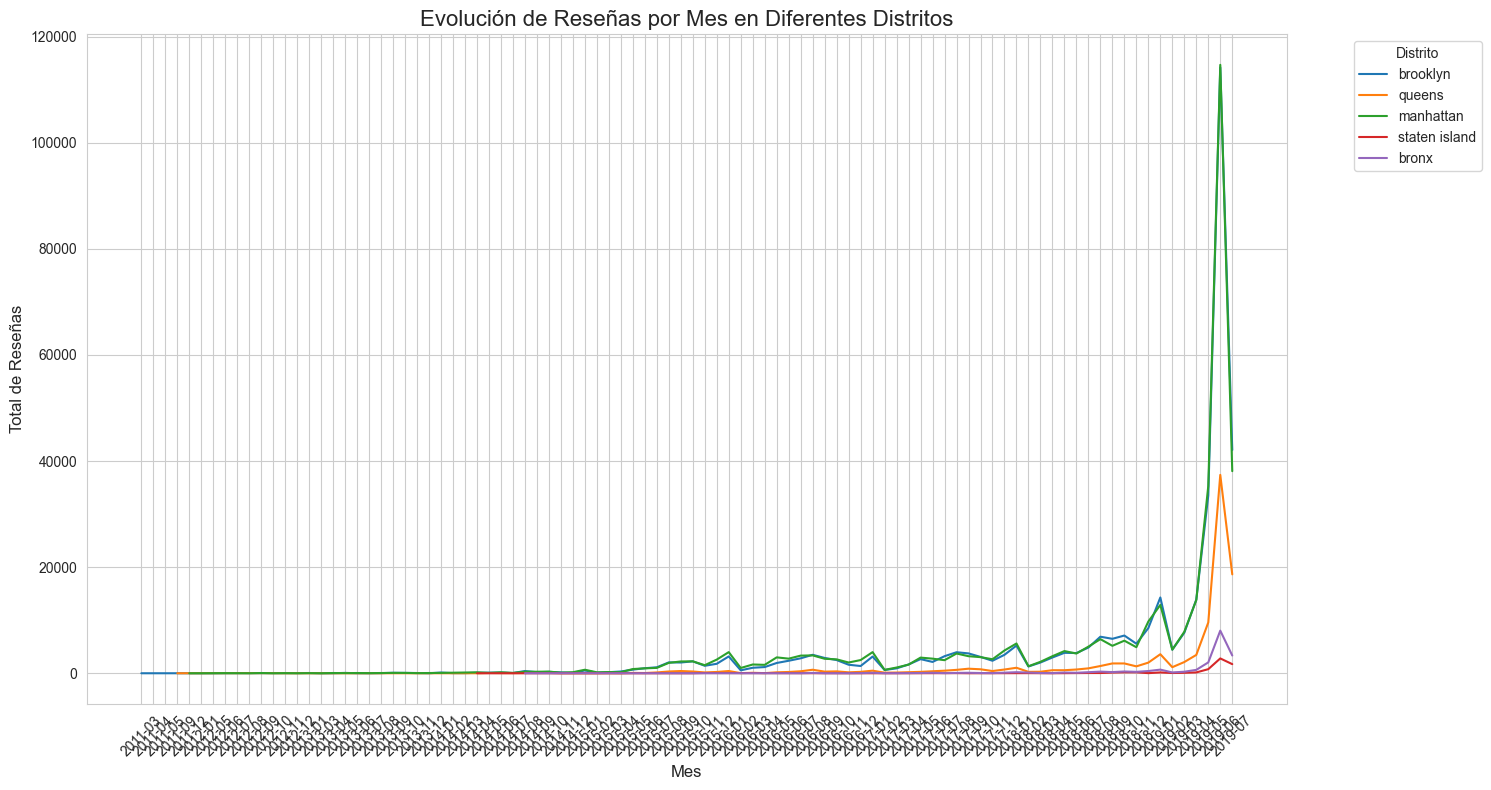

In [19]:
### 5. ¿Cómo evoluciona el número de reseñas por mes en los diferentes distritos?
# Se utiliza el modelo dm_listings
query_reseñas_mes = """
    SELECT
        district,
        last_review_date
    FROM dm_listings
    WHERE last_review_date IS NOT NULL;
"""
df_reseñas_mes = fetch_data(query_reseñas_mes)

if df_reseñas_mes is not None:
    df_reseñas_mes['last_review_date'] = pd.to_datetime(df_reseñas_mes['last_review_date'])
    df_reseñas_mes['review_month'] = df_reseñas_mes['last_review_date'].dt.to_period('M')
    
    reviews_per_month = df_reseñas_mes.groupby(['review_month', 'district']).size().reset_index(name='total_reviews')
    reviews_per_month['review_month'] = reviews_per_month['review_month'].astype(str)

    plt.figure(figsize=(15, 8))
    sns.lineplot(x='review_month', y='total_reviews', hue='district', data=reviews_per_month)
    plt.title('Evolución de Reseñas por Mes en Diferentes Distritos', fontsize=16)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Total de Reseñas', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

C:\Users\YAS\AppData\Local\Temp\ipykernel_16664\3427463623.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depreca

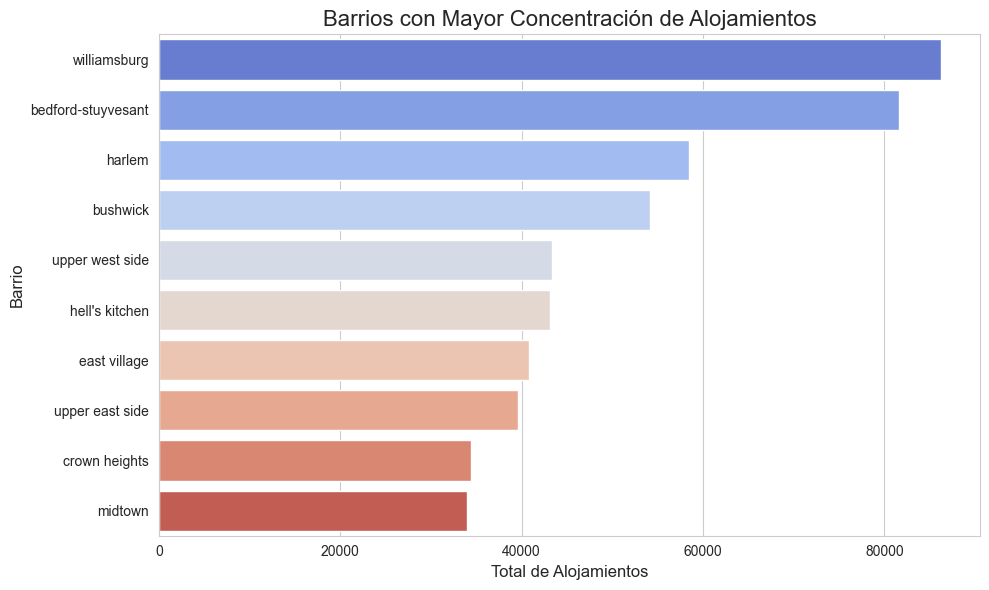

In [20]:
### 6. ¿Qué barrios tienen la mayor concentración de alojamientos activos?
# Se utiliza el modelo dm_listings_by_location
query_concentracion_barrios = """
    SELECT
        neighborhood,
        SUM(total_listings) AS total_listings
    FROM dm_listings_by_location
    GROUP BY neighborhood
    ORDER BY total_listings DESC
    LIMIT 10;
"""
df_concentracion_barrios = fetch_data(query_concentracion_barrios)

if df_concentracion_barrios is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='total_listings', y='neighborhood', data=df_concentracion_barrios, palette='coolwarm')
    plt.title('Barrios con Mayor Concentración de Alojamientos', fontsize=16)
    plt.xlabel('Total de Alojamientos', fontsize=12)
    plt.ylabel('Barrio', fontsize=12)
    plt.tight_layout()
    plt.show()


C:\Users\YAS\AppData\Local\Temp\ipykernel_16664\3427463623.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


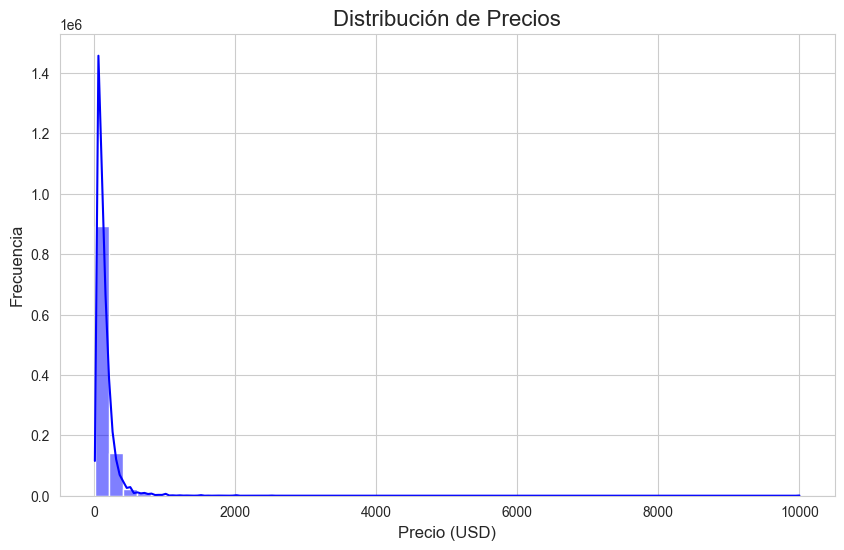

e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


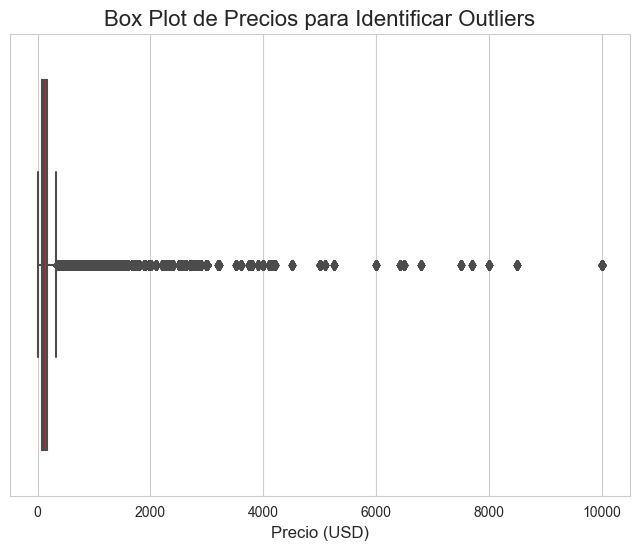

In [21]:
### 7. ¿Cómo se distribuyen los precios y qué outliers existen?
# Se utiliza el modelo dm_listings
query_distribucion_precios = """
    SELECT
        price_usd
    FROM dm_listings;
"""
df_distribucion_precios = fetch_data(query_distribucion_precios)

if df_distribucion_precios is not None:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_distribucion_precios['price_usd'], bins=50, kde=True, color='blue')
    plt.title('Distribución de Precios', fontsize=16)
    plt.xlabel('Precio (USD)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.show()

    # Gráfico de caja para identificar outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_distribucion_precios['price_usd'], color='red')
    plt.title('Box Plot de Precios para Identificar Outliers', fontsize=16)
    plt.xlabel('Precio (USD)', fontsize=12)
    plt.show()

C:\Users\YAS\AppData\Local\Temp\ipykernel_16664\3427463623.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Proyecto\Henry\Mod 3\Proyecto Integrador\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


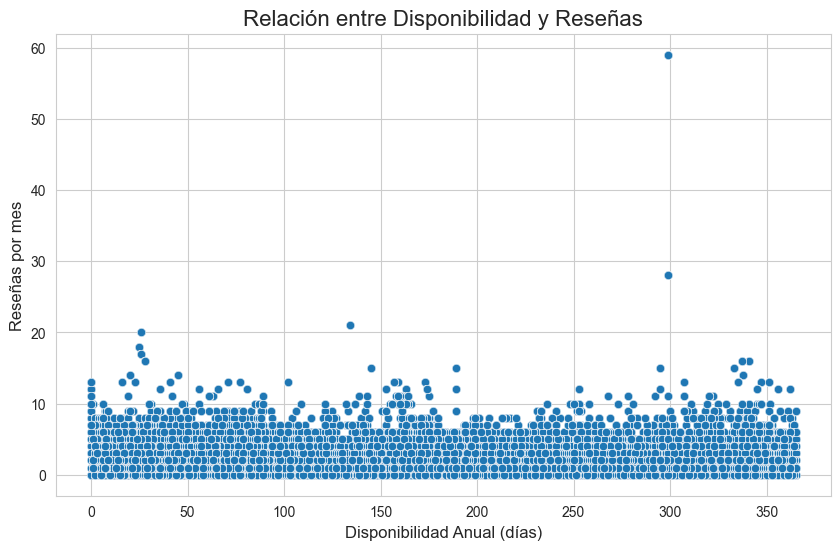

In [31]:
### 8. ¿Qué relación hay entre la disponibilidad anual y la cantidad de reseñas?
# Se utiliza el modelo dm_listings
query_relacion_disponibilidad_reseñas = """
    SELECT
        availability,
        reviews_per_month
    FROM dm_listings
    WHERE reviews_per_month IS NOT NULL;
"""
df_relacion_disponibilidad_reseñas = fetch_data(query_relacion_disponibilidad_reseñas)

if df_relacion_disponibilidad_reseñas is not None:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='availability', y='reviews_per_month', data=df_relacion_disponibilidad_reseñas, alpha=0.6)
    plt.title('Relación entre Disponibilidad y Reseñas', fontsize=16)
    plt.xlabel('Disponibilidad Anual (días)', fontsize=12)
    plt.ylabel('Reseñas por mes', fontsize=12)
    plt.show()

In [ ]:
# Cierre de la conexión a la base de datos
if conn:
    cursor.close()
    conn.close()
    print("Conexión a MySQL cerrada.")